In [99]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
data_path=('amazon_cells_labelled.txt')

In [101]:
comments_raw_untouched = pd.read_csv(data_path, delimiter= '\t', header=None)

In [102]:
comments_raw_untouched.columns = ['Comment', 'Rating']
comments_raw=comments_raw_untouched.copy()

# Iteration #1
Number of mislabeled points out of a total 1000 points : 319

## Feature Engineering
Here I choose keywords that are associated first with good reveiws, then adding negative words to attempt to remove false positives such as "not good, disappointed". In terms of further features, all caps are equally used for positives and negatives

In [103]:
keywords=['great','good','impressed','excellent','fine','recommend','exactly','wise','worthwhile','fantastic']

In [104]:
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    comments_raw[str(key)] = comments_raw.Comment.str.contains(
        (str(key)),
        case=False
    )

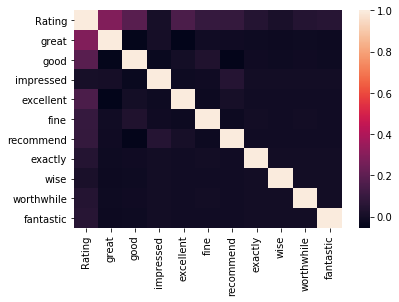

In [105]:
sns.heatmap(comments_raw.corr())

In [106]:
data = comments_raw[keywords]
target = comments_raw['Rating']

In [107]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 319


# Iteration #2
Number of mislabeled points out of a total 1000 points : 404

In [108]:
keywords2 = ['low','poor','bad','terrible','waste','hate','problem','disappoint','stupid','horrible']

In [109]:
comments_raw_2 = comments_raw_untouched.copy()

In [110]:
for key in keywords2:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    comments_raw_2[str(key)] = comments_raw_2.Comment.str.contains(
        (str(key)),
        case=False
    )

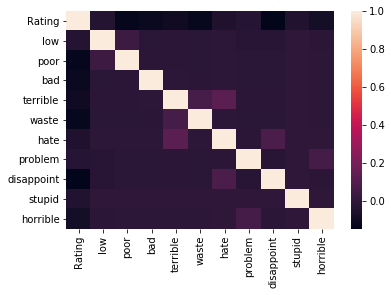

In [111]:
sns.heatmap(comments_raw_2.corr())

In [112]:
data2 = comments_raw_2[keywords2]
target2 = comments_raw_2['Rating']

In [113]:
bnb = BernoulliNB()

bnb.fit(data2, target2)

y_pred2 = bnb.predict(data2)

print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target2 != y_pred2).sum()
))

Number of mislabeled points out of a total 1000 points : 404


# Iteration #3
Number of mislabeled points out of a total 1000 points : 338

In [114]:
keywords3=['great','good','impressed','excellent','fine','low','poor','bad','terrible','waste']

In [115]:
comments_raw_3 = comments_raw_untouched.copy()

In [116]:
for key in keywords3:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    comments_raw_3[str(key)] = comments_raw_3.Comment.str.contains(
        (str(key)),
        case=False
    )

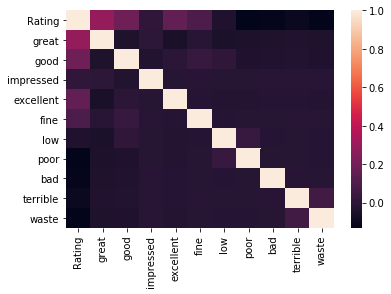

In [117]:
sns.heatmap(comments_raw_3.corr())

In [118]:
data3 = comments_raw_3[keywords3]
target3 = comments_raw_3['Rating']

In [119]:
bnb = BernoulliNB()

bnb.fit(data3, target3)

y_pred3 = bnb.predict(data3)

print("Number of mislabeled points out of a total {} points : {}".format(
    data3.shape[0],
    (target3 != y_pred3).sum()
))

Number of mislabeled points out of a total 1000 points : 338


# Iteration #4
Number of mislabeled points out of a total 1000 points : 315

In [120]:
keywords4=['great','good','impressed','excellent','fine','recommend','exactly','wise','worthwhile','fantastic','low','poor','bad','terrible','waste','hate','problem','disappoint','stupid','horrible']

In [121]:
comments_raw_4 = comments_raw_untouched.copy()

In [122]:
for key in keywords4:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    comments_raw_4[str(key)] = comments_raw_4.Comment.str.contains(
        (str(key)),
        case=False
    )

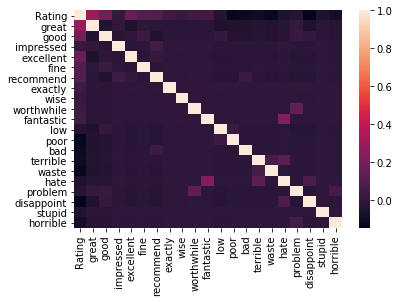

In [123]:
sns.heatmap(comments_raw_4.corr())

In [124]:
data4 = comments_raw_4[keywords4]
target4 = comments_raw_4['Rating']

In [125]:
bnb = BernoulliNB()

bnb.fit(data4, target4)

y_pred4 = bnb.predict(data4)

print("Number of mislabeled points out of a total {} points : {}".format(
    data4.shape[0],
    (target4 != y_pred4).sum()
))

Number of mislabeled points out of a total 1000 points : 315


# Iteration #5
Number of mislabeled points out of a total 1000 points : 284

In [126]:
from collections import Counter
word_array=Counter(" ".join(comments_raw_untouched['Comment']).split(" ")).items()

In [127]:
word_df=pd.DataFrame(list(word_array))

In [128]:
word_df.columns=['word','count']

In [129]:
word_df['word']=word_df['word'].str.lower()
word_df['word']=word_df['word'].str.strip()
word_df['word']=word_df['word'].str.replace('.', '', regex=False)
word_df['word']=word_df['word'].str.replace('!', '', regex=False)

In [130]:
# not 91,good 53, great 33,recommend 24,well 18, better 15, love 16, worked 15, best 15,
word_df.sort_values('count', ascending=False).head(50)

,word,count
12,the,414
75,and,307
15,i,303
2,is,238
18,a,207
7,to,195
9,it,176
157,this,143
70,my,130
56,of,117


In [131]:
keywords5=['not','good','great','recommend','well','love','better','worked','best']

In [132]:
comments_raw_5 = comments_raw_untouched.copy()

In [133]:
for key in keywords5:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    comments_raw_5[str(key)] = comments_raw_5.Comment.str.contains(
        (str(key)),
        case=False
    )

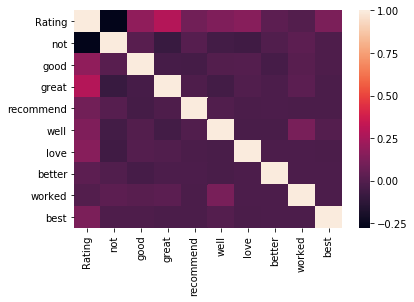

In [134]:
sns.heatmap(comments_raw_5.corr())

In [135]:
data5 = comments_raw_5[keywords5]
target5 = comments_raw_5['Rating']

In [136]:
bnb = BernoulliNB()

bnb.fit(data5, target5)

y_pred5 = bnb.predict(data5)

print("Number of mislabeled points out of a total {} points : {}".format(
    data5.shape[0],
    (target5 != y_pred5).sum()
))

Number of mislabeled points out of a total 1000 points : 284


# Write Up
Iteration 5 was the best perfoming, with an overall accuracy of 71.6%. Overfitting seeems to be happening in all iterations, having cross validation scores move as much as 8%. The feature that worked the best was using a word count to identify the most common words typed that have postive or negative conotations.

In [142]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [151]:
cross_val_score(bnb, data, target, cv=5)

array([0.715, 0.705, 0.68 , 0.635, 0.665])

In [145]:
confusion_matrix(target, y_pred)

array([[473,  27],
       [292, 208]], dtype=int64)

In [152]:
cross_val_score(bnb, data2, target2, cv=5)

array([0.625, 0.62 , 0.585, 0.55 , 0.6  ])

In [138]:
confusion_matrix(target2, y_pred2)

array([[115, 385],
       [ 19, 481]], dtype=int64)

In [153]:
cross_val_score(bnb, data3, target3, cv=5)

array([0.69 , 0.695, 0.655, 0.61 , 0.65 ])

In [139]:
confusion_matrix(target3, y_pred3)

array([[479,  21],
       [317, 183]], dtype=int64)

In [154]:
cross_val_score(bnb, data4, target4, cv=5)

array([0.715, 0.705, 0.68 , 0.64 , 0.665])

In [140]:
confusion_matrix(target4, y_pred4)

array([[475,  25],
       [290, 210]], dtype=int64)

In [155]:
cross_val_score(bnb, data5, target5, cv=5)

array([0.745, 0.735, 0.71 , 0.69 , 0.67 ])

In [141]:
confusion_matrix(target5, y_pred5)

array([[475,  25],
       [259, 241]], dtype=int64)